In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\harri\Desktop\DataScienceProj\dataset\autoscout24-germany-dataset.csv")

In [3]:
data.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [5]:
total = data.isnull().sum().sort_values(ascending=False)
percent = data.isnull().sum()/data.isnull().count()*100
percent_rounded = (round(percent, 1)).sort_values(ascending=False)
missing = pd.concat([total, percent_rounded], axis=1, keys=['Total', '%'])
missing.head(5)

,Total,%
gear,182,0.4
model,143,0.3
hp,29,0.1
mileage,0,0.0
make,0,0.0


In [6]:
data = data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46071 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46071 non-null  int64  
 1   make       46071 non-null  object 
 2   model      46071 non-null  object 
 3   fuel       46071 non-null  object 
 4   gear       46071 non-null  object 
 5   offerType  46071 non-null  object 
 6   price      46071 non-null  int64  
 7   hp         46071 non-null  float64
 8   year       46071 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.5+ MB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,46071.0,71233.136637,62454.130350,0.0,19900.0,60000.0,105000.0,1111111.0
price,46071.0,16563.121248,19279.603138,1100.0,7490.0,11000.0,19490.0,1199900.0
hp,46071.0,132.992663,75.074689,1.0,86.0,116.0,150.0,850.0
year,46071.0,2016.012155,3.155555,2011.0,2013.0,2016.0,2019.0,2021.0


In [10]:
data.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


c:\Users\harri\anaconda3\envs\myproject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


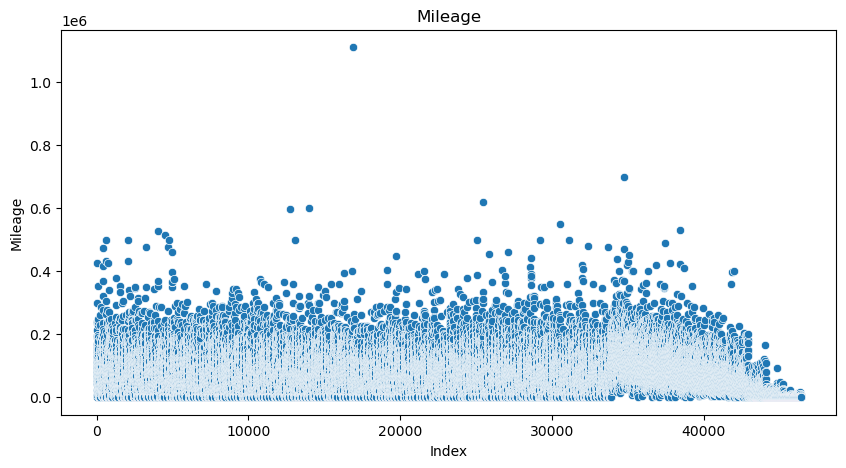

In [13]:
plt.figure(figsize=(10,5))
plt.title('Mileage')
plt.xlabel('Index')
plt.ylabel('Mileage')
sns.scatterplot(data.index,data['mileage'])
plt.show()

<AxesSubplot:xlabel='mileage', ylabel='Count'>

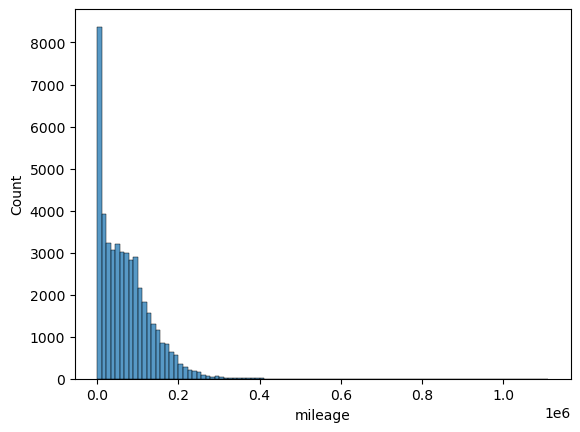

In [35]:
sns.histplot(x="mileage",data=data, bins=100)

From the plot, it can be seen that the value mileage is around 0 to 0.3x10^6

In [14]:
data["mileage"].min(), data["mileage"].max()

(0, 1111111)

c:\Users\harri\anaconda3\envs\myproject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


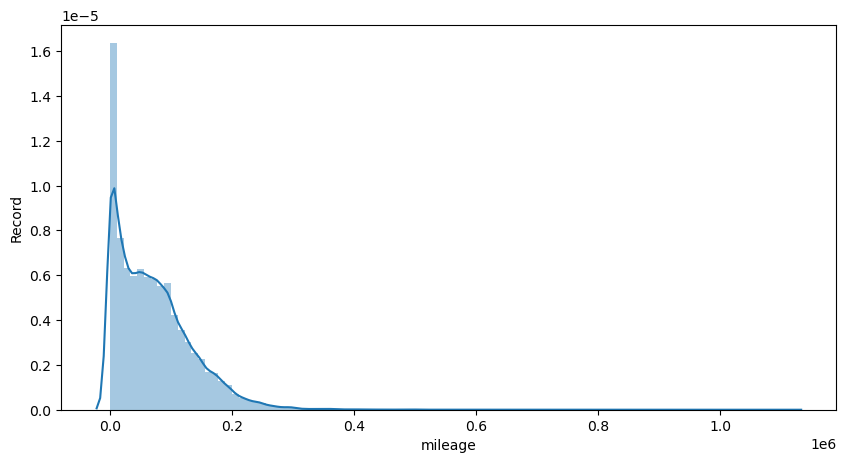

In [31]:
plt.figure(figsize=(10,5))
# plt.xlim(0,1111111)
# plt.ylim(0,1400)
plt.xlabel('Mileage')
plt.ylabel('Record')
sns.distplot(data['mileage'],bins=100,kde=True)
plt.show()

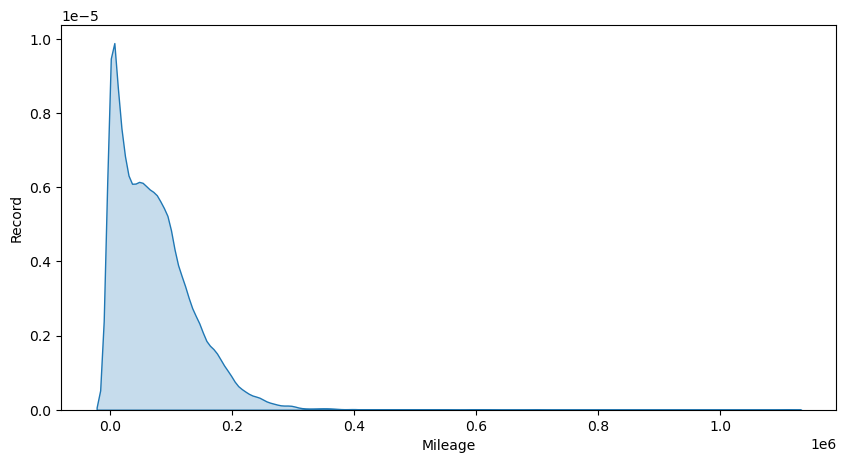

In [32]:
plt.figure(figsize=(10,5))
plt.xlabel('Mileage')
plt.ylabel('Record')
sns.kdeplot(data['mileage'],shade=True)
plt.show()

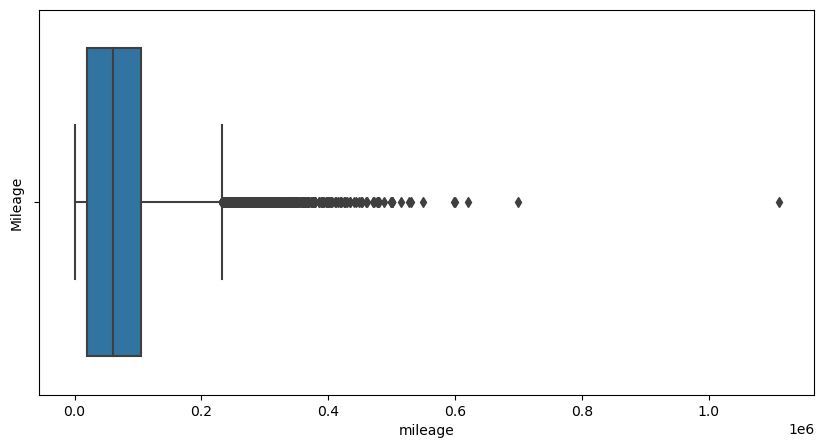

In [33]:
plt.figure(figsize=(10,5))
plt.ylabel('Mileage')
sns.boxplot(x=data['mileage'])
plt.show()

Based on the above boxplot, it has lots of outliers.

Based on this link https://byjus.com/question-answer/what-is-meant-by-mileage-of-a-vehicle/#:~:text=1%3A%20Its%20how%20many%20kilometers,usage%20of%20the%20term%20mileage., mileage is used to depict how many kilometers/ miles the vehicle has covered in its life time.

From the data, "mileage" feature might have some relations with year, hp, offerType features. Plus, year is the only ordinal discrete type

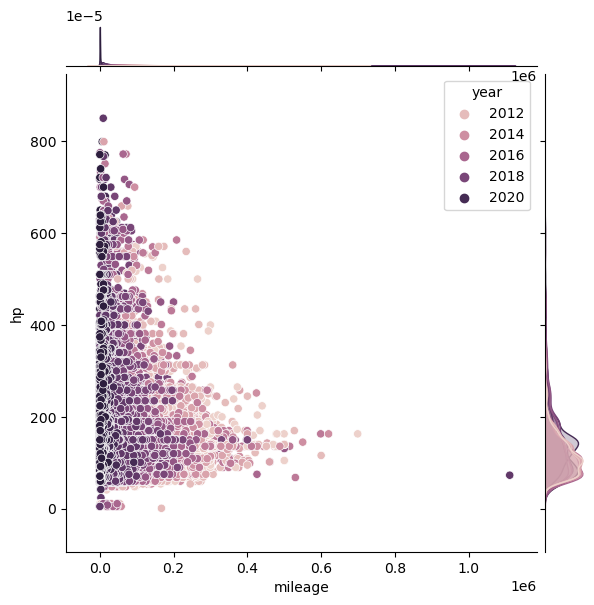

In [39]:
sns.jointplot(x="mileage",y="hp",data=data, hue="year")

Both mileage and hp variables do not have any relationsip as there is no pattern from the graph.

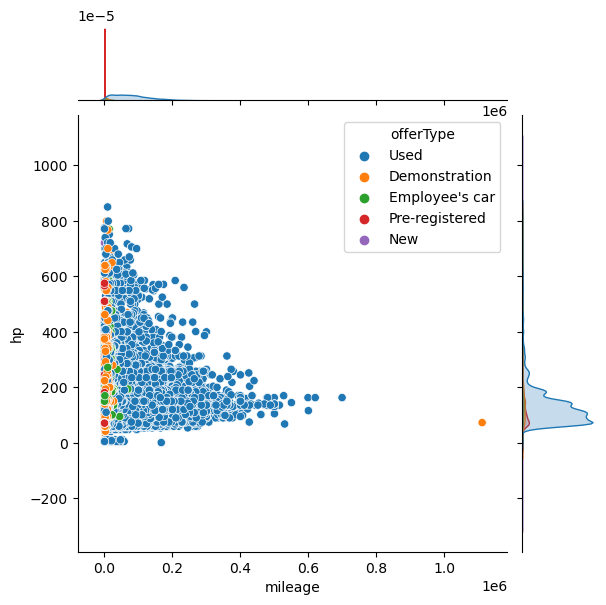

In [48]:

sns.jointplot(x="mileage",y="hp",data=data, hue="offerType")
plt.show()

In [69]:
data.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [46]:
data["offerType"].value_counts()

Used              39822
Pre-registered     2768
Demonstration      2351
Employee's car     1117
New                  13
Name: offerType, dtype: int64

From the above graph, most cars are Used type and it covers more than 85% (roughly) from the whole dataset

From the above graph, it shows that most cars at year (2018 -2021) have low mileage. When the mileage increase, the year approaches to later years from 2017 to 2011 (decresing pattern).

Cars at recent years have low mileage because they are still New car while cars at former years have high mileage because they are Used cars

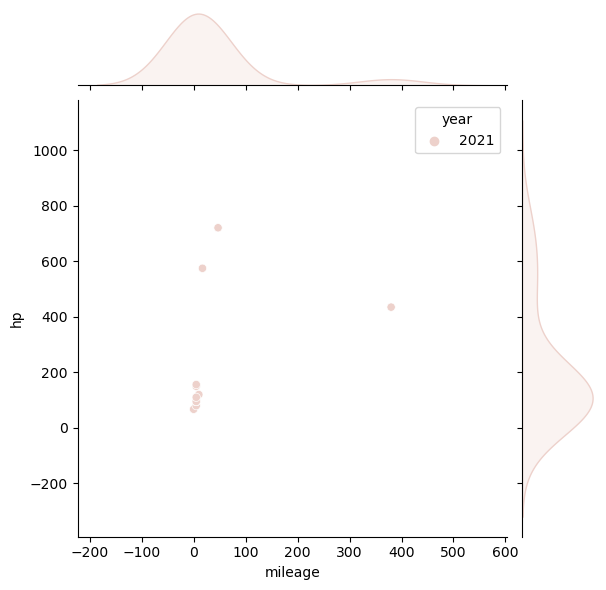

In [51]:
# plt.xlim(0,500)
# plt.ylim(0,1000)
sns.jointplot(x="mileage",y="hp",data=data.query('offerType == "New"'), hue="year")
plt.show()

From the above graph, it proves my assumption that most new

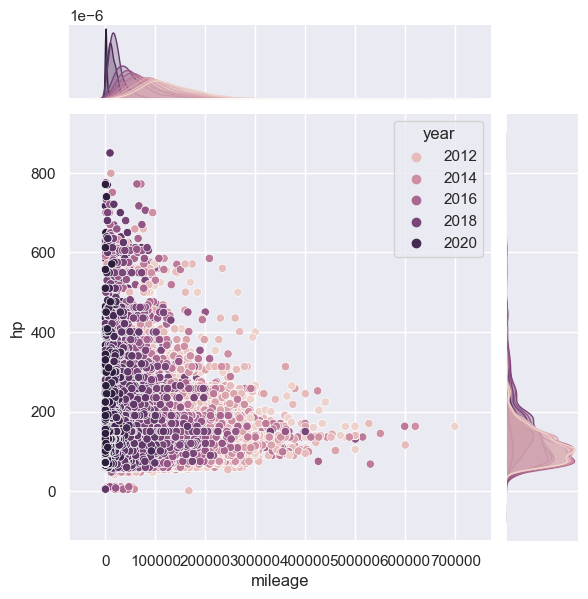

In [64]:

sns.jointplot(x="mileage",y="hp",data=data.query(' offerType =="Used"'), hue="year")
plt.show()

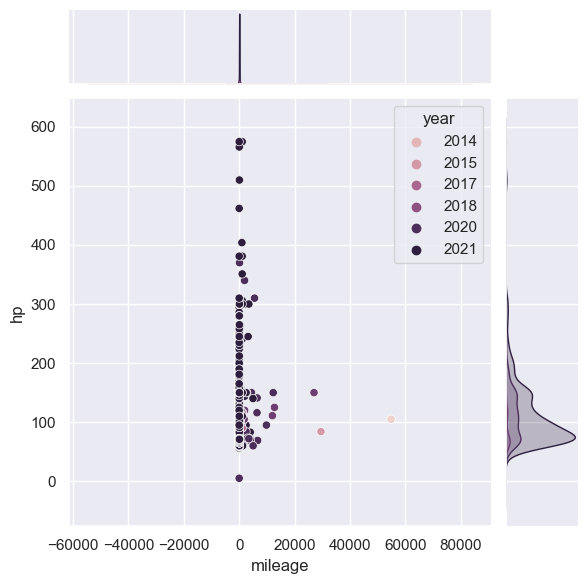

In [66]:
sns.jointplot(x="mileage",y="hp",data=data.query(' offerType =="Pre-registered"'), hue="year")
plt.show()

Based on this website https://heycar.co.uk/guides/what-is-a-pre-reg-or-nearly-new-car, Pre-registered A pre-reg car is a car that has been registered (assigned a number plate and an owner) before it has been sold, this is usually done to boost a manufacturers sales figures. They’ll potentially have covered a few thousand miles – so they’re cheaper to buy than a new car.

Based on the graph, car with pre-registered tye can be considered as New because it has similar mileage distribution.

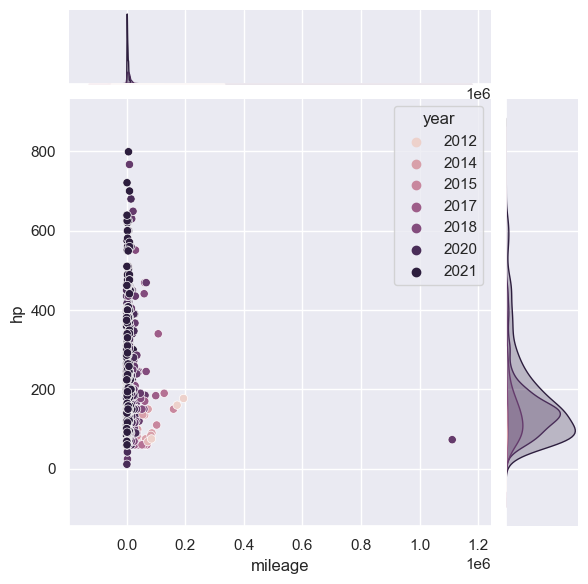

In [67]:
sns.jointplot(x="mileage",y="hp",data=data.query(' offerType =="Demonstration"'), hue="year")
plt.show()

Based on this website https://www.google.com/search?q=what+is+demonstration+car&oq=what+is+demonstration+car&aqs=chrome..69i57.5080j0j4&sourceid=chrome&ie=UTF-8 , A demonstrator car (or demo) is a new car that has been driven by the dealership's salesmen, managers or executives but has never been registered with the state

Plus, based on the graph, it can be seen that Car with Demonstration type has similar mileage distribution with New car.

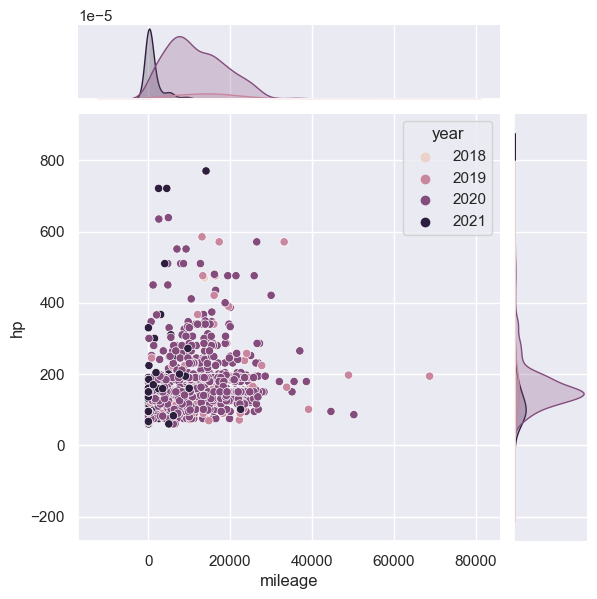

In [68]:
# plt.xlim(0,500)
# plt.ylim(0,1000)
sns.set(rc={'figure.figsize':(15,30)})
sns.jointplot(x="mileage",y="hp",data=data.query('offerType == "Employee\'s car"'), hue="year")
plt.show()

In [65]:
data["offerType"].value_counts()

Used              39822
Pre-registered     2768
Demonstration      2351
Employee's car     1117
New                  13
Name: offerType, dtype: int64

In [36]:
data.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


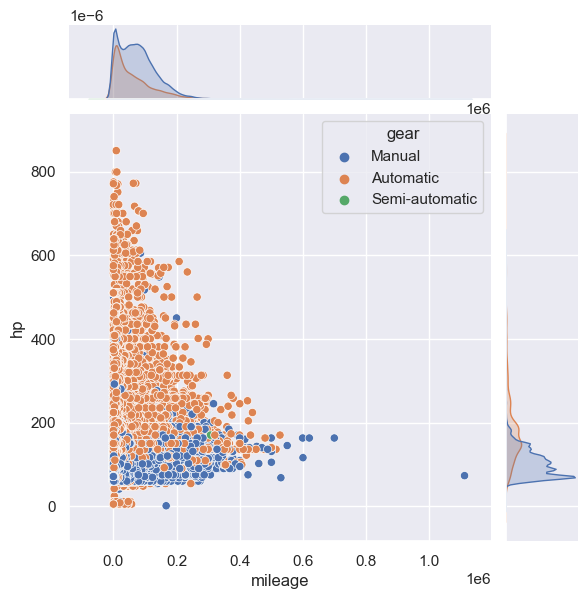

In [71]:
# plt.xlim(0,500)
# plt.ylim(0,1000)
sns.set(rc={'figure.figsize':(15,30)})
# sns.jointplot(x="mileage",y="hp",data=data.query('offerType == "Employee\'s car"'), hue="year")
sns.jointplot(x="mileage",y="hp",data=data, hue="gear")
plt.show()

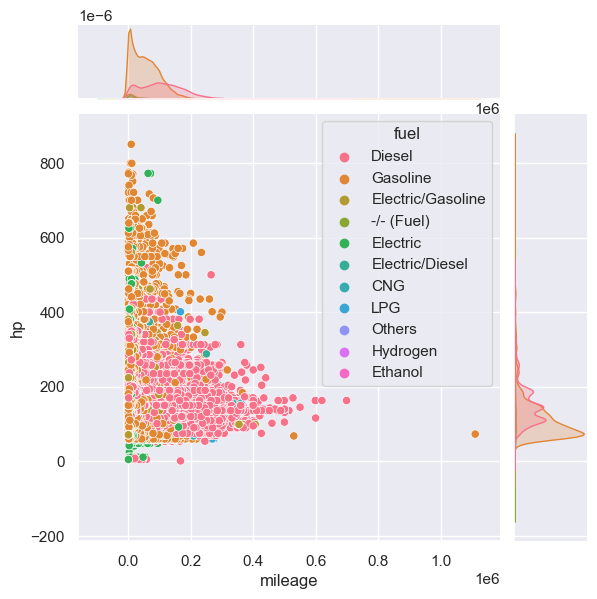

In [72]:
# plt.xlim(0,500)
# plt.ylim(0,1000)
sns.set(rc={'figure.figsize':(15,30)})
# sns.jointplot(x="mileage",y="hp",data=data.query('offerType == "Employee\'s car"'), hue="year")
sns.jointplot(x="mileage",y="hp",data=data, hue="fuel")
plt.show()

ICE vehicles ignite and combust fuel within an internal combustion engine (ICE). Electric vehicles (EVs) are powered by the electricity from a rechargeable battery instead. from https://www.elastoproxy.com/ice-vehicles-vs-electric-vehicles/ 
The difference between ICE and EV: https://www.arenaev.com/ice_v_ev__differences_and_similarities-news-185.php

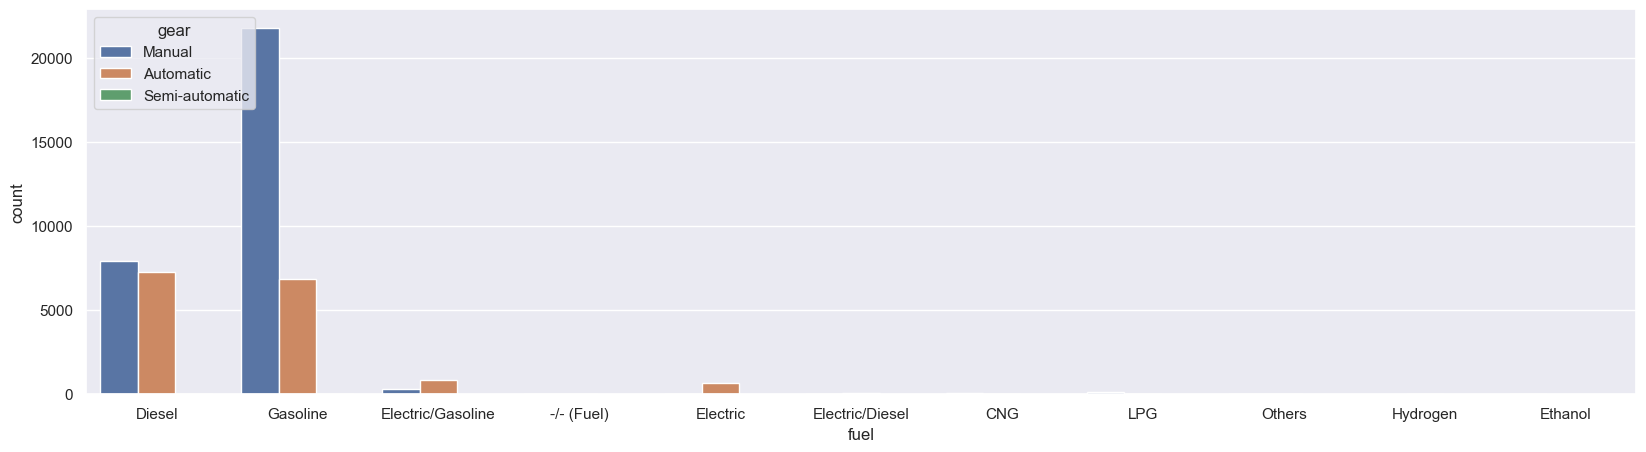

In [75]:
plt.figure(figsize=(20,5))
sns.countplot(x='fuel', hue='gear', data=data)
plt.show()

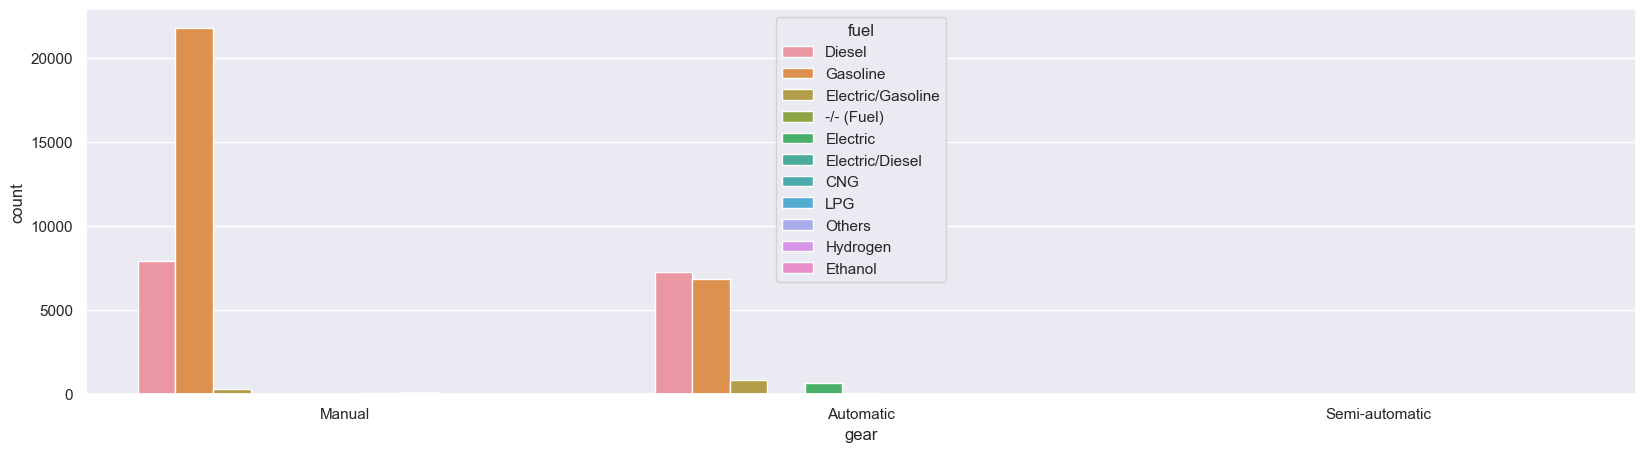

In [76]:
plt.figure(figsize=(20,5))
sns.countplot(x='gear', hue='fuel', data=data,)
plt.show()

c:\Users\harri\anaconda3\envs\myproject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


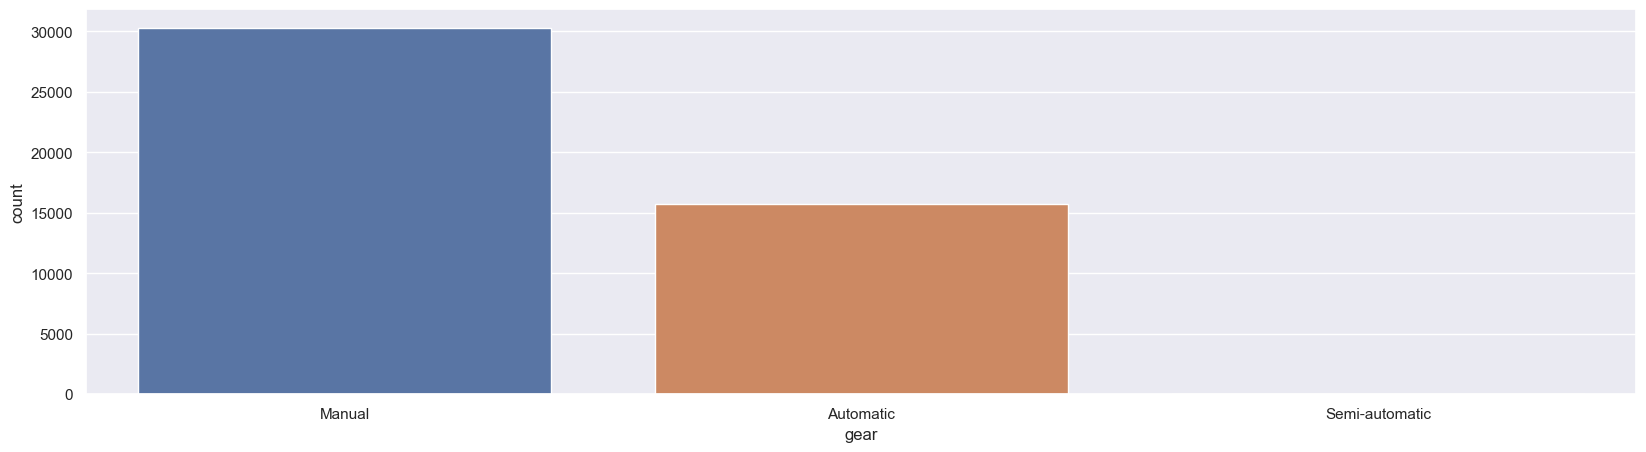

In [79]:
plt.figure(figsize=(20,5))
sns.countplot(data["gear"])
plt.show()

In [78]:
data.query('gear == "Manual"')["fuel"].value_counts()


Gasoline             21804
Diesel                7922
Electric/Gasoline      301
LPG                    109
CNG                     95
Others                  37
-/- (Fuel)              16
Electric                16
Electric/Diesel          7
Ethanol                  2
Name: fuel, dtype: int64

In [91]:
data.query('gear == "Automatic"')["fuel"].value_counts()


Diesel               7240
Gasoline             6876
Electric/Gasoline     845
Electric              645
Electric/Diesel        46
CNG                    21
LPG                    16
Others                 10
-/- (Fuel)              6
Hydrogen                1
Name: fuel, dtype: int64

Does manual transmission have Electric source of energy?
Impossible! Records with manual gear should not have electric fuel because based on this website, https://www.dsautomobiles.co.uk/ds-experience/electric-hybrid/guides/are-all-ev-s-automatic.html#:~:text=Are%20Electric%20Cars%20Automatic%20or,car%3A%20the%20accelerator%20and%20brake, all Ev cars have automatic transmission. Currently we have EV cars with manual transmission based on https://robbreport.com/motors/cars/manual-transmission-electric-vehicles-future-1234774864/ but the invention is introduced around 2022 which is outside from the database range of year.

In [85]:
data.query('gear == "Manual" & fuel =="Electric"')


,mileage,make,model,fuel,gear,offerType,price,hp,year
546,10,Hyundai,Ioniq,Electric,Manual,Demonstration,27670,120.0,2019
2276,0,Hyundai,Kona,Electric,Manual,Used,44750,204.0,2021
2882,2000,Opel,Zafira Life,Electric,Manual,Demonstration,47490,136.0,2020
2903,1500,Skoda,Enyaq,Electric,Manual,Demonstration,57460,204.0,2021
16620,14577,Renault,ZOE,Electric,Manual,Demonstration,10660,92.0,2017
17728,23000,smart,forFour,Electric,Manual,Used,12888,82.0,2018
18073,35501,Renault,ZOE,Electric,Manual,Used,7560,58.0,2014
18417,20,Ford,Mustang,Electric,Manual,Pre-registered,58440,294.0,2021
20830,23000,smart,forFour,Electric,Manual,Used,12888,82.0,2018
22812,50,Mazda,MX-30,Electric,Manual,Demonstration,21990,110.0,2021


In [86]:
data.query('gear == "Manual" & fuel =="Electric/Diesel"')


,mileage,make,model,fuel,gear,offerType,price,hp,year
14129,10,Ford,Tourneo Custom,Electric/Diesel,Manual,Pre-registered,37999,185.0,2021
27266,10,Ford,Kuga,Electric/Diesel,Manual,Pre-registered,34690,150.0,2021
44351,4352,Ford,Kuga,Electric/Diesel,Manual,Employee's car,27470,150.0,2020
44352,12073,Ford,Kuga,Electric/Diesel,Manual,Employee's car,27470,150.0,2020
45388,15,Ford,Tourneo Custom,Electric/Diesel,Manual,Pre-registered,39970,185.0,2021
45389,15,Ford,Tourneo Custom,Electric/Diesel,Manual,Pre-registered,39970,185.0,2021
46078,10,Kia,XCeed,Electric/Diesel,Manual,Pre-registered,25603,136.0,2021


In [90]:
data.query(' fuel =="Others"')

,mileage,make,model,fuel,gear,offerType,price,hp,year
3001,50150,Toyota,Verso-S,Others,Manual,Used,9450,99.0,2015
3133,49,Fiat,500,Others,Manual,Pre-registered,14190,69.0,2021
4513,53750,Hyundai,i10,Others,Manual,Used,6880,69.0,2014
4514,53750,Hyundai,i10,Others,Manual,Used,6880,69.0,2014
4860,800,Fiat,500,Others,Manual,Pre-registered,14490,69.0,2021
4868,49,Fiat,500,Others,Manual,Pre-registered,14989,69.0,2021
5219,43400,Toyota,Aygo,Others,Manual,Used,8584,72.0,2018
6544,1500,Renault,Clio,Others,Manual,Demonstration,15580,72.0,2021
7221,119076,Renault,Clio,Others,Manual,Used,5990,73.0,2013
8087,87051,Toyota,Yaris,Others,Automatic,Used,10200,101.0,2014


In [89]:
data["fuel"].value_counts()

Gasoline             28720
Diesel               15178
Electric/Gasoline     1146
Electric               661
LPG                    125
CNG                    116
Electric/Diesel         53
Others                  47
-/- (Fuel)              22
Ethanol                  2
Hydrogen                 1
Name: fuel, dtype: int64

ICE - Gasoline, Diesel, LPG, CNG, -/- (Fuel), Ethanol, Hydrogen, Others
EV = Electric, Electric/Gasoline, Electric/Diesel, 

In [80]:
data.query('gear == "Automatic"')["fuel"].value_counts()


Diesel               7240
Gasoline             6876
Electric/Gasoline     845
Electric              645
Electric/Diesel        46
CNG                    21
LPG                    16
Others                 10
-/- (Fuel)              6
Hydrogen                1
Name: fuel, dtype: int64

Does automatic transmission have Electric source of energy?
Does automatic transmission support both electric and non-electric source of energy?


In [81]:
data["gear"].value_counts()

Manual            30309
Automatic         15706
Semi-automatic       56
Name: gear, dtype: int64

In [84]:
data.query('gear == "Semi-automatic"')["fuel"].value_counts()

Gasoline    40
Diesel      16
Name: fuel, dtype: int64

Semi-automatic transmission can be considered as ICE because all the fuel type are non-electric such as diesel, gasoline

In [92]:
data.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


c:\Users\harri\anaconda3\envs\myproject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


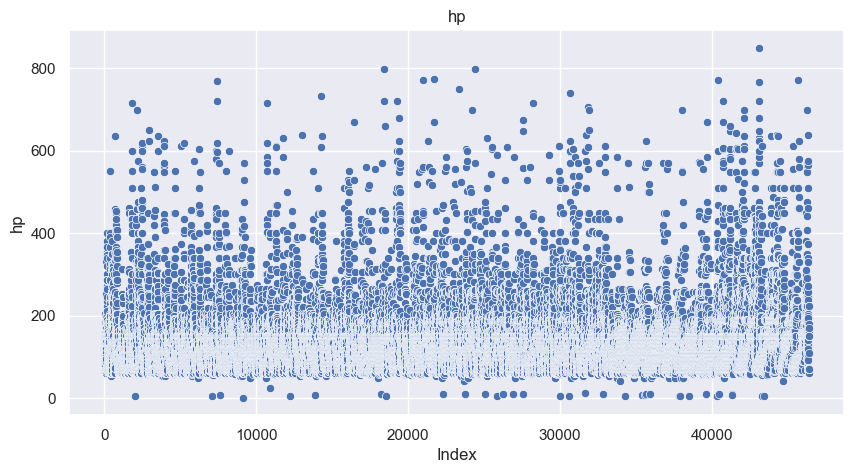

In [94]:
# sns.scatterplot(x=data.index, y = data["hp"])
# plt.show()

plt.figure(figsize=(10,5))
plt.title('hp')
plt.xlabel('Index')
plt.ylabel('hp')
sns.scatterplot(data.index,data['hp'])
plt.show()

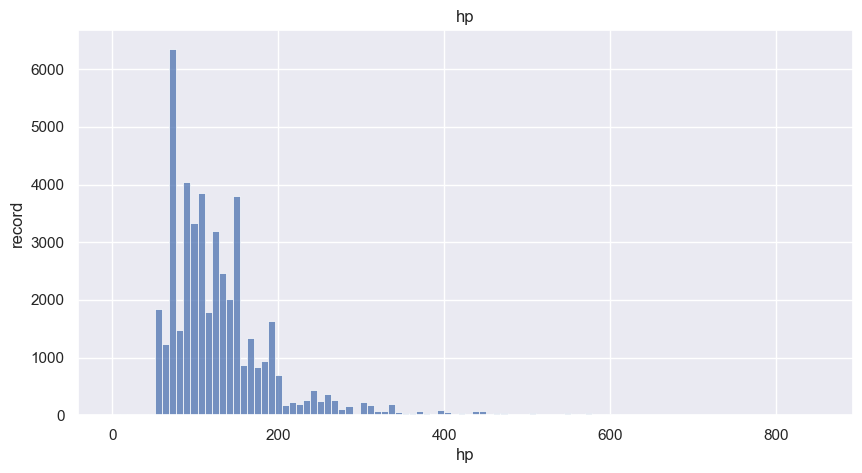

In [98]:

plt.figure(figsize=(10,5))
plt.title('hp')
plt.xlabel('hp')
plt.ylabel('record')
sns.histplot(x="hp",data=data, bins=100)
plt.show()

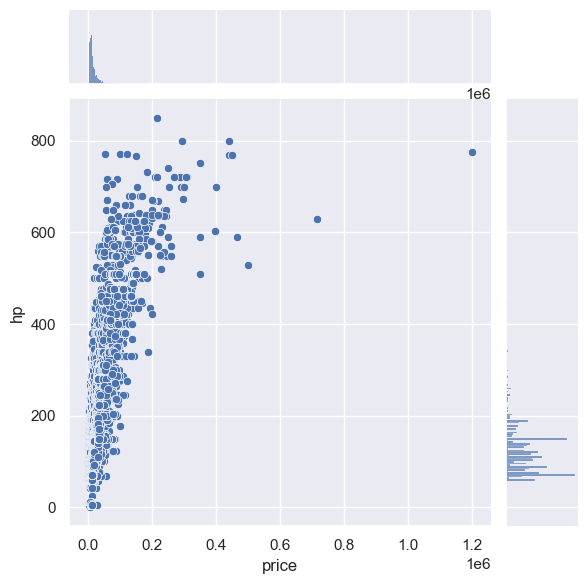

In [103]:

sns.jointplot(x="price",y="hp",data=data, )
plt.show()

From the graph, it shows that the increase of price will slightly increase the horsepower. 

In [99]:
data.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


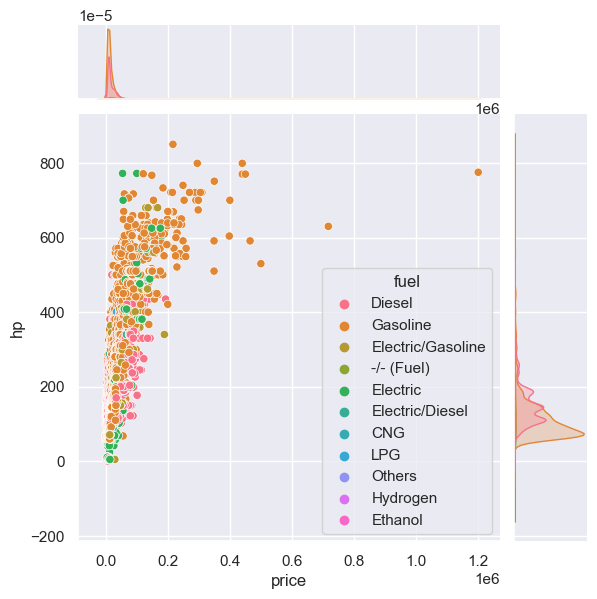

In [101]:

sns.jointplot(x="price",y="hp",data=data, hue = data["fuel"])
plt.show()

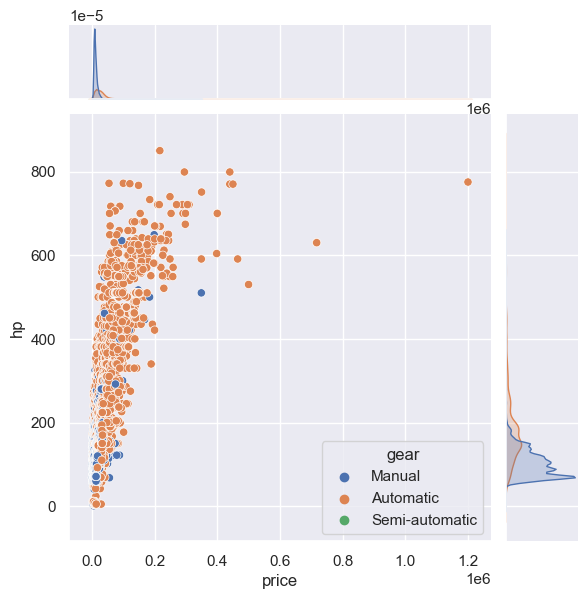

In [102]:

sns.jointplot(x="price",y="hp",data=data, hue = data["gear"])
plt.show()

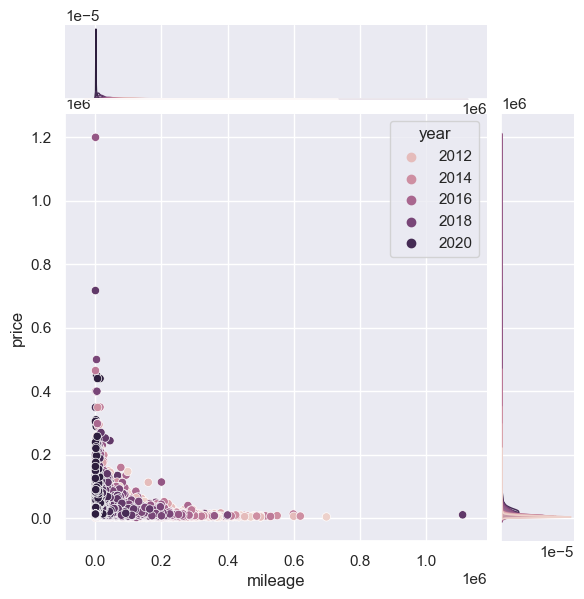

In [107]:

sns.jointplot(x="mileage",y="price",data=data, hue=data["year"])
plt.show()

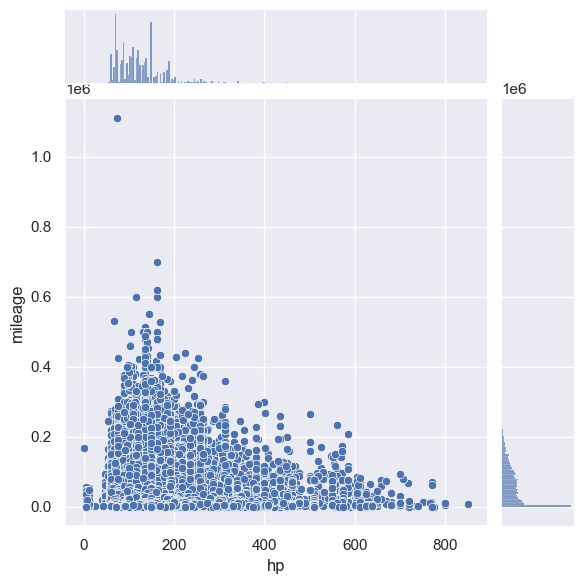

In [105]:

sns.jointplot(x="hp",y="mileage",data=data, )
plt.show()

In [108]:
ICE =[ "Gasoline", "Diesel", "LPG", "CNG", "-/- (Fuel)", "Ethanol", "Hydrogen", "Others"]
EV = ["Electric", "Electric/Gasoline", "Electric/Diesel"]

df = data.assign(carType = "EV" if data['fuel']=="Electric" or data['fuel']=="Electric/Gasoline" or data['fuel']=="Electric/Diesel"  else "ICE" )

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [9]:
data.to_csv("autoscout-germany-dataset-revised.csv")

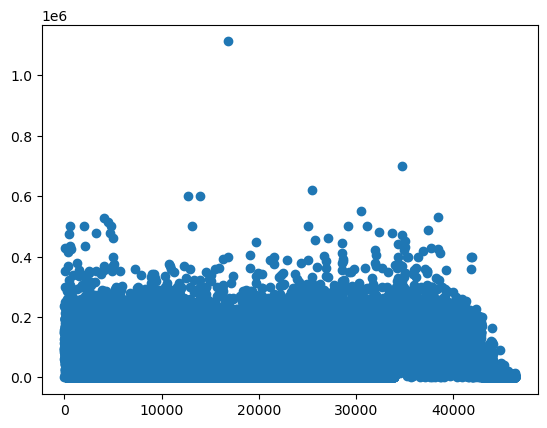

<AxesSubplot:ylabel='mileage'>

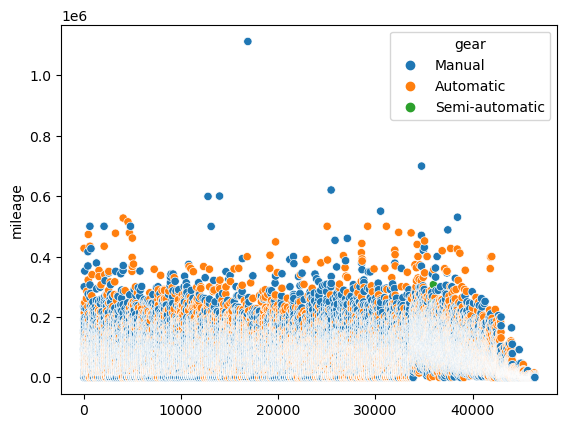

In [10]:
sns.scatterplot(x=data.index, y = data["mileage"], hue = data["gear"])

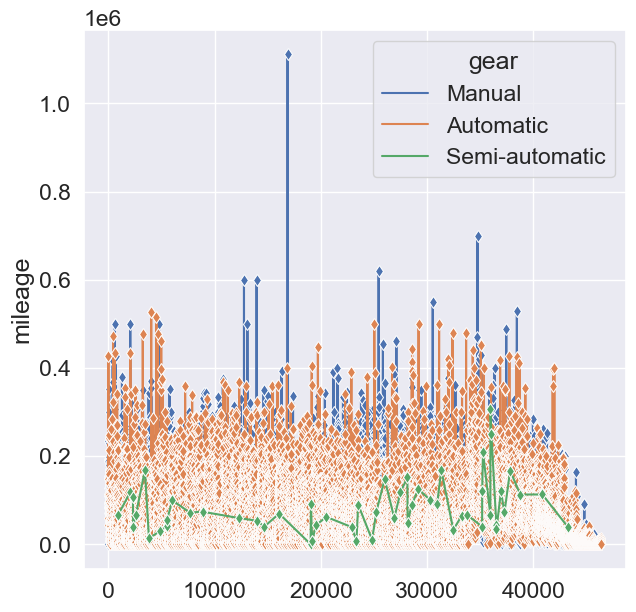

In [11]:
sns.set(rc={"figure.figsize": (7,7)})
sns.set(font_scale =1.5)
fig = sns.lineplot(x=data.index, y = data["mileage"], markevery =1, marker ="d", data = data, hue=data["gear"])

<AxesSubplot:ylabel='mileage'>

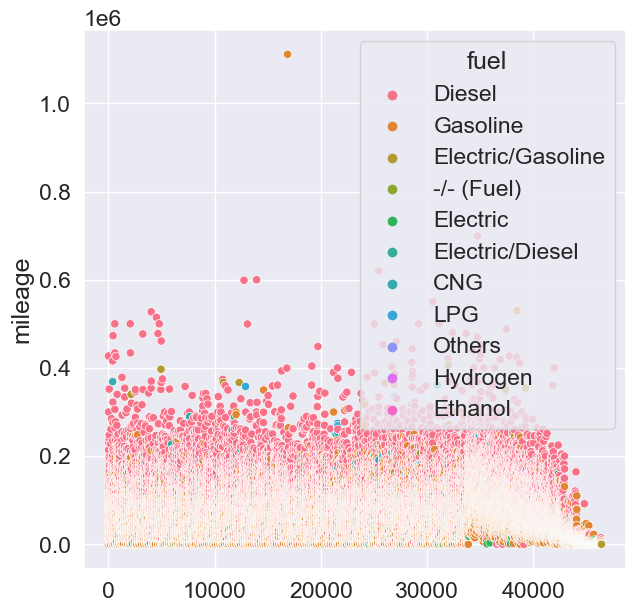

In [12]:
sns.scatterplot(x=data.index, y = data["mileage"], hue = data["fuel"])

(array([8.375e+03, 3.923e+03, 3.228e+03, 3.056e+03, 3.214e+03, 3.024e+03,
        2.983e+03, 2.831e+03, 2.892e+03, 2.154e+03, 1.815e+03, 1.557e+03,
        1.301e+03, 1.154e+03, 8.600e+02, 8.310e+02, 6.460e+02, 5.540e+02,
        3.620e+02, 2.770e+02, 2.130e+02, 1.770e+02, 1.520e+02, 9.700e+01,
        7.400e+01, 5.200e+01, 6.400e+01, 3.600e+01, 2.000e+01, 1.400e+01,
        1.800e+01, 2.100e+01, 1.700e+01, 1.300e+01, 7.000e+00, 9.000e+00,
        8.000e+00, 5.000e+00, 5.000e+00, 4.000e+00, 3.000e+00, 2.000e+00,
        3.000e+00, 4.000e+00, 2.000e+00, 5.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

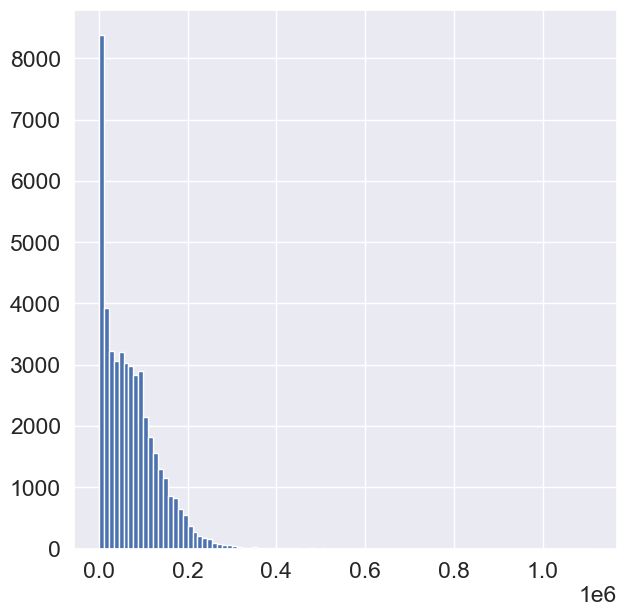

In [21]:
plt.hist(data["mileage"], range=(data["mileage"].min(),data["mileage"].max() ), bins=100)

(array([4.5871e+04, 1.6800e+02, 2.1000e+01, 7.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.10000e+03, 1.20980e+05, 2.40860e+05, 3.60740e+05, 4.80620e+05,
        6.00500e+05, 7.20380e+05, 8.40260e+05, 9.60140e+05, 1.08002e+06,
        1.19990e+06]),
 <BarContainer object of 10 artists>)

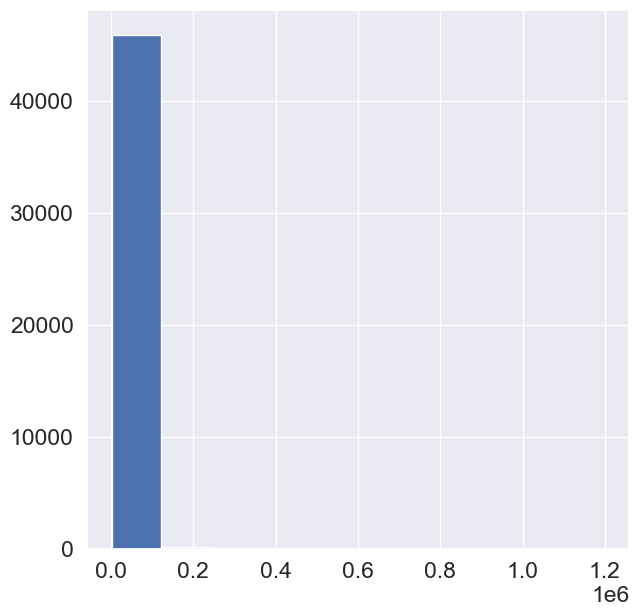

In [14]:
plt.hist(data["price"])

(array([1.0970e+04, 2.6732e+04, 5.6470e+03, 1.6440e+03, 4.7400e+02,
        3.3200e+02, 1.3900e+02, 1.0100e+02, 2.2000e+01, 1.0000e+01]),
 array([  1. ,  85.9, 170.8, 255.7, 340.6, 425.5, 510.4, 595.3, 680.2,
        765.1, 850. ]),
 <BarContainer object of 10 artists>)

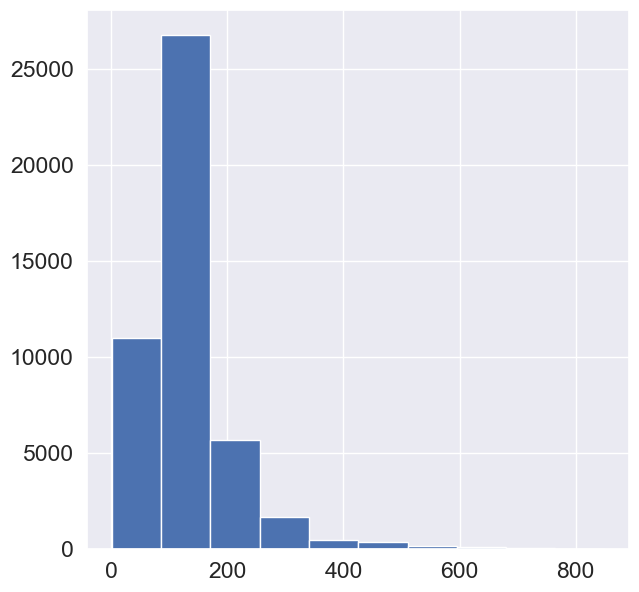

In [15]:
plt.hist(data["hp"])

In [22]:
data.columns

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')

In [24]:
data["mileage"].value_counts()

10        1310
50         370
20         361
5          253
100        245
          ... 
169125       1
249567       1
88131        1
36562        1
837          1
Name: mileage, Length: 20020, dtype: int64

In [27]:
data.query('mileage == 0 ')

,mileage,make,model,fuel,gear,offerType,price,hp,year
2276,0,Hyundai,Kona,Electric,Manual,Used,44750,204.0,2021
2909,0,Land,Rover Discovery,Diesel,Automatic,Demonstration,79999,300.0,2021
5054,0,Hyundai,i10,Gasoline,Manual,New,12579,67.0,2021
5673,0,Hyundai,i30,Gasoline,Automatic,Demonstration,23450,140.0,2020
6110,0,Renault,Clio,Gasoline,Manual,Pre-registered,17250,91.0,2021
...,...,...,...,...,...,...,...,...,...
45900,0,Fiat,500,Gasoline,Manual,Pre-registered,13990,71.0,2021
45914,0,Abarth,595C,Gasoline,Manual,Demonstration,27290,179.0,2021
45979,0,Skoda,Kamiq,Gasoline,Manual,Pre-registered,18490,95.0,2021
45996,0,Dacia,Duster,Gasoline,Manual,Pre-registered,18080,131.0,2021


In [8]:
#find make that has null value for gear
make_has_null_value1 = []
for index, row in enumerate(data["gear"].isnull()):
    if row == True:
        make_has_null_value1.append(data["make"][index])

list_make1 =np.unique(make_has_null_value1)
print("\n{} makes have some null values".format(len(list_make1)))
print("This list: ", list_make1)



34 makes have some null values
This list:  ['Alfa' 'Alpine' 'BMW' 'Caravans-Wohnm' 'Citroen' 'DAF' 'Dacia' 'Dodge'
 'Fiat' 'Ford' 'Hyundai' 'Kia' 'Lada' 'MINI' 'Mazda' 'Mercedes-Benz'
 'Mitsubishi' 'Nissan' 'Opel' 'Others' 'Peugeot' 'Piaggio' 'Renault'
 'SEAT' 'Skoda' 'Suzuki' 'Tazzari' 'Tesla' 'Toyota' 'Trailer-Anhänger'
 'Trucks-Lkw' 'Volkswagen' 'Volvo' 'smart']


In [40]:
list1 = data[data["make"]=="smart"]

print(len(np.array(list1.loc[:, "make"])))

list1.loc[:,'model'] = list1.loc[:,'model'].astype('str')
list1.loc[:,'gear'] = list1.loc[:,'gear'].astype('str')
smart_model = np.unique(np.array(list1.loc[:,'model'] ), return_counts=True)
smart_gear = np.unique(np.array(list1.loc[:,'gear'] ), return_counts=True)
print(smart_model)
print(smart_gear)

974
(array(['brabus', 'city-coupé/city-cabrio', 'forFour', 'forTwo', 'nan'],
      dtype=object), array([  2,   1, 244, 725,   2], dtype=int64))
(array(['Automatic', 'Manual', 'Semi-automatic', 'nan'], dtype=object), array([586, 346,  26,  16], dtype=int64))


C:\Users\harri\AppData\Local\Temp\ipykernel_1424\1944445785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list1.loc[:,'model'] = list1.loc[:,'model'].astype('str')
C:\Users\harri\AppData\Local\Temp\ipykernel_1424\1944445785.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list1.loc[:,'gear'] = list1.loc[:,'gear'].astype('str')


In [42]:
new_list1 = list1[list1["model"]=="forFour"]
print(new_list1)
forfour_gear = np.unique(new_list1["gear"])
print(forfour_gear)

       mileage   make    model      fuel       gear       offerType  price  \
133      31500  smart  forFour  Gasoline     Manual            Used   6999   
307      20000  smart  forFour  Gasoline  Automatic   Demonstration   9299   
980      13850  smart  forFour  Gasoline     Manual            Used  11880   
1331     40000  smart  forFour  Gasoline  Automatic            Used   8690   
1374     28951  smart  forFour  Gasoline     Manual            Used   8490   
...        ...    ...      ...       ...        ...             ...    ...   
43728    27840  smart  forFour  Gasoline  Automatic            Used  15790   
44083    31529  smart  forFour  Gasoline     Manual            Used   9122   
44396     2000  smart  forFour  Electric  Automatic  Employee's car  12990   
44946     3000  smart  forFour  Electric  Automatic   Demonstration  17390   
45093     2908  smart  forFour  Electric  Automatic  Employee's car  18800   

         hp  year  
133    71.0  2017  
307    71.0  2015  
980

In [27]:
new_list1 = list1[list1["gear"]=="nan"]
new_list1

,mileage,make,model,fuel,gear,offerType,price,hp,year
5795,26000,smart,forTwo,Electric,nan,Used,6800,48.0,2015
9934,52500,smart,forTwo,Electric,nan,Used,9555,48.0,2014
10695,8100,smart,forFour,Electric,nan,Used,11800,82.0,2019
11699,30800,smart,forTwo,Gasoline,nan,Used,8479,71.0,2017
12950,32000,smart,forTwo,Electric,nan,Used,8200,48.0,2015
19426,5600,smart,forTwo,Electric,nan,Used,16499,82.0,2020
21394,45100,smart,forTwo,Electric,nan,Used,5249,48.0,2013
21594,95000,smart,forTwo,Gasoline,nan,Used,3554,61.0,2012
21926,50000,smart,forTwo,Gasoline,nan,Used,8850,71.0,2018
26929,43860,smart,forTwo,Gasoline,nan,Used,5600,71.0,2013


In [33]:
#find make that has null value for gear
make_has_null_value2 = []
for index, row in enumerate(data["model"].isnull()):
    if row == True:
        make_has_null_value2.append(data["make"][index])

list_make2 =np.unique(make_has_null_value2)
print("\n{} makes have some null values".format(len(list_make2)))



34 makes have some null values


In [34]:
list_make1

array(['Alfa', 'Alpine', 'BMW', 'Caravans-Wohnm', 'Citroen', 'DAF',
       'Dacia', 'Dodge', 'Fiat', 'Ford', 'Hyundai', 'Kia', 'Lada', 'MINI',
       'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel', 'Others',
       'Peugeot', 'Piaggio', 'Renault', 'SEAT', 'Skoda', 'Suzuki',
       'Tazzari', 'Tesla', 'Toyota', 'Trailer-Anhänger', 'Trucks-Lkw',
       'Volkswagen', 'Volvo', 'smart'], dtype='<U16')

In [35]:
list_make2

array(['9ff', 'Aixam', 'Alpine', 'Audi', 'BMW', 'Baic', 'Bentley',
       'Caravans-Wohnm', 'Citroen', 'DAF', 'Ford', 'Hyundai', 'Infiniti',
       'Iveco', 'Kia', 'Lada', 'Lancia', 'Lexus', 'MINI', 'Maybach',
       'Mercedes-Benz', 'Microcar', 'Nissan', 'Opel', 'Others', 'Porsche',
       'Renault', 'Skoda', 'Suzuki', 'Tesla', 'Trailer-Anhänger',
       'Volkswagen', 'Volvo', 'smart'], dtype='<U16')

In [38]:
list = np.intersect1d(list_make1, list_make2)
list

array(['Alpine', 'BMW', 'Caravans-Wohnm', 'Citroen', 'DAF', 'Ford',
       'Hyundai', 'Kia', 'Lada', 'MINI', 'Mercedes-Benz', 'Nissan',
       'Opel', 'Others', 'Renault', 'Skoda', 'Suzuki', 'Tesla',
       'Trailer-Anhänger', 'Volkswagen', 'Volvo', 'smart'], dtype='<U16')

In [45]:
#replace null value if it has some similarities with make and model

for every_make in list_make1:
    check_list1 = data[data["make"] == every_make]
    check_list1 = check_list1[["make","model","gear"]]
    # print(check_list1)
    model = np.unique(np.array(check_list1["model"]))
    print(model)
    print(len(model))
    # for every_model in model:
    #     print(every_model)
    #     check_list2 = check_list1[check_list1["model"]==every_model]
    #     print(check_list2)

    break


['Romeo 159' 'Romeo 4C' 'Romeo Giulia' 'Romeo Giulietta' 'Romeo MiTo'
 'Romeo Quadrifoglio' 'Romeo Sportwagon' 'Romeo Stelvio']
8


In [65]:
check_list1 = data[data["make"] == "BMW"]
# check_list1 = check_list1[["make","model","gear"]]
print(check_list1)
model = np.unique(np.array(str(check_list1["model"])))
print(model)
print(len(model))

       mileage make model      fuel       gear       offerType  price     hp  \
0       235000  BMW   316    Diesel     Manual            Used   6800  116.0   
26      299900  BMW   118    Diesel     Manual            Used   7950  143.0   
29      133500  BMW   118    Diesel     Manual            Used   7980  143.0   
33      150000  BMW   118    Diesel     Manual            Used   7999  143.0   
39      214000  BMW   320    Diesel  Automatic            Used   8199  184.0   
...        ...  ...   ...       ...        ...             ...    ...    ...   
46288     4000  BMW    M4  Gasoline  Automatic  Employee's car  97470  510.0   
46295     5000  BMW    X1  Gasoline  Automatic            Used  38300  192.0   
46326       45  BMW   iX3  Electric        NaN            Used  58000  286.0   
46347     2000  BMW  X3 M    Diesel  Automatic   Demonstration  79900  340.0   
46348      100  BMW   340  Gasoline  Automatic   Demonstration  82648  374.0   

       year  
0      2011  
26     2012

In [58]:
check_list2 = check_list1[check_list1["model"]=="Romeo Giulia"]
print(check_list2)

       make         model       gear
5451   Alfa  Romeo Giulia        NaN
9237   Alfa  Romeo Giulia  Automatic
10033  Alfa  Romeo Giulia  Automatic
14130  Alfa  Romeo Giulia  Automatic
19232  Alfa  Romeo Giulia  Automatic
19241  Alfa  Romeo Giulia  Automatic
20415  Alfa  Romeo Giulia     Manual
28270  Alfa  Romeo Giulia  Automatic
33025  Alfa  Romeo Giulia  Automatic
41342  Alfa  Romeo Giulia  Automatic
41349  Alfa  Romeo Giulia  Automatic
41602  Alfa  Romeo Giulia  Automatic
41748  Alfa  Romeo Giulia     Manual
42106  Alfa  Romeo Giulia  Automatic
43240  Alfa  Romeo Giulia  Automatic
43254  Alfa  Romeo Giulia  Automatic
43981  Alfa  Romeo Giulia  Automatic
44158  Alfa  Romeo Giulia  Automatic
44213  Alfa  Romeo Giulia  Automatic
46286  Alfa  Romeo Giulia  Automatic


Based on the above information, the gear, model and hp columns have some null values. Each of them has a very low percentage of null value (less than 1%) which can be removed directly. However, the missing type of both gear and model can be considered as missing at random because the value can be retrieved back by checking other variables associated with gear and model such as make. Hence, the null value in gear columns can be retrieved if both model and and make have some similarities. 

In [71]:
data['gear'] = data['gear'].astype('str')

In [72]:
np.unique(np.array(data["gear"]))

array(['Automatic', 'Manual', 'Semi-automatic', 'nan'], dtype=object)

In [73]:
#change object dtype to string type
for col in data.columns:
    if str(data[col].dtype) == 'object':
        data[col] = data[col].astype('str')


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46405 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46405 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [75]:
len(np.unique(data["model"]))

842

In [76]:
np.unique(data["model"])

array(['107', '108', '114', '116', '118', '120', '123', '124 Spider',
       '125', '135', '140', '1500', '2', '2008', '206', '207', '208',
       '214', '216', '218', '220', '225', '230', '235', '240', '250', '3',
       '3-Wheeler', '300', '3008', '300C', '301', '308', '316', '318',
       '320', '323', '325', '328', '330', '335', '340', '370Z', '4008',
       '407', '418', '420', '428', '430', '435', '440', '458', '488', '5',
       '500', '5008', '500C', '500L', '500X', '500e', '508', '518', '520',
       '523', '525', '528', '530', '535', '540', '550', '570S', '595',
       '595 Competizione', '595 Turismo', '595C', '6', '600LT', '630',
       '640', '650', '675LT', '695', '720S', '730', '740', '750', '760',
       '807', '812', '840', '911', '991', '992', '997', 'A 160', 'A 180',
       'A 200', 'A 220', 'A 250', 'A 35 AMG', 'A 45 AMG', 'A1', 'A110',
       'A3', 'A4', 'A4 allroad', 'A5', 'A6', 'A6 allroad', 'A7', 'A8',
       'AMG GT', 'ASX', 'ATS', 'Accord', 'Across', 'Adam', '

In [77]:
np.unique(np.array(data["make"]))

array(['9ff', 'Abarth', 'Aixam', 'Alfa', 'Alpina', 'Alpine', 'Aston',
       'Audi', 'BMW', 'Baic', 'Bentley', 'Brilliance', 'Cadillac',
       'Caravans-Wohnm', 'Chevrolet', 'Chrysler', 'Citroen', 'Corvette',
       'Cupra', 'DAF', 'DFSK', 'DS', 'Dacia', 'Daihatsu', 'Dodge',
       'Estrima', 'FISKER', 'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai',
       'Infiniti', 'Isuzu', 'Iveco', 'Jaguar', 'Jeep', 'Kia', 'Lada',
       'Lamborghini', 'Lancia', 'Land', 'Lexus', 'Ligier', 'MINI',
       'Maserati', 'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz',
       'Microcar', 'Mitsubishi', 'Morgan', 'Nissan', 'Opel', 'Others',
       'Peugeot', 'Piaggio', 'Polestar', 'Porsche', 'RAM', 'Renault',
       'Rolls-Royce', 'SEAT', 'Skoda', 'SsangYong', 'Subaru', 'Suzuki',
       'Tazzari', 'Tesla', 'Toyota', 'Trailer-Anhänger', 'Trucks-Lkw',
       'Volkswagen', 'Volvo', 'Zhidou', 'smart'], dtype=object)

In [78]:
len(np.unique(np.array(data["make"])))


77

In [89]:
make_has_null_val =[]
for every_gear, every_make in zip(np.array(data["gear"]), np.array(data["make"])):
    # print(every_gear, every_make)
    if every_gear == "nan":
        make_has_null_val.append(every_make)


In [94]:
print("Out of {} manufacturers ".format(len(np.unique(data["make"])))   + str(len(np.unique(make_has_null_val) )) + " has null values")

Out of 77 manufacturers 34 has null values


In [95]:
np.unique(make_has_null_val)

array(['Alfa', 'Alpine', 'BMW', 'Caravans-Wohnm', 'Citroen', 'DAF',
       'Dacia', 'Dodge', 'Fiat', 'Ford', 'Hyundai', 'Kia', 'Lada', 'MINI',
       'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel', 'Others',
       'Peugeot', 'Piaggio', 'Renault', 'SEAT', 'Skoda', 'Suzuki',
       'Tazzari', 'Tesla', 'Toyota', 'Trailer-Anhänger', 'Trucks-Lkw',
       'Volkswagen', 'Volvo', 'smart'], dtype='<U16')

In [96]:
# selecting rows based on condition
ds_alfa = data[data['make'] == "Alfa"]

In [98]:
np.unique(ds_alfa["model"])

array(['Romeo 159', 'Romeo 4C', 'Romeo Giulia', 'Romeo Giulietta',
       'Romeo MiTo', 'Romeo Quadrifoglio', 'Romeo Sportwagon',
       'Romeo Stelvio'], dtype=object)

In [101]:
ds_alfa[ds_alfa["model"] == "Romeo Giulia"]

,mileage,make,model,fuel,gear,offerType,price,hp,year
5451,13444,Alfa,Romeo Giulia,Gasoline,nan,Used,29980,200.0,2019
9237,10,Alfa,Romeo Giulia,Gasoline,Automatic,Pre-registered,43849,280.0,2020
10033,9867,Alfa,Romeo Giulia,Gasoline,Automatic,Used,27945,200.0,2019
14130,500,Alfa,Romeo Giulia,Gasoline,Automatic,Demonstration,38480,200.0,2021
19232,500,Alfa,Romeo Giulia,Gasoline,Automatic,Demonstration,56980,280.0,2021
19241,2500,Alfa,Romeo Giulia,Gasoline,Automatic,Demonstration,75680,510.0,2021
20415,98808,Alfa,Romeo Giulia,Diesel,Manual,Used,19950,179.0,2017
28270,16200,Alfa,Romeo Giulia,Gasoline,Automatic,Demonstration,38512,280.0,2019
33025,10,Alfa,Romeo Giulia,Gasoline,Automatic,Pre-registered,49889,280.0,2021
41342,79987,Alfa,Romeo Giulia,Diesel,Automatic,Used,19589,150.0,2017


In [97]:
ds_alfa[["model","make","gear"]]

,model,make,gear
1458,Romeo Giulietta,Alfa,Manual
2331,Romeo Giulietta,Alfa,Manual
2981,Romeo Giulietta,Alfa,Manual
3774,Romeo Giulietta,Alfa,Manual
4464,Romeo MiTo,Alfa,Manual
...,...,...,...
45931,Romeo Stelvio,Alfa,Automatic
45932,Romeo Stelvio,Alfa,Automatic
46181,Romeo Stelvio,Alfa,Automatic
46212,Romeo Stelvio,Alfa,Automatic


In [59]:
# selecting rows based on condition
ds_abarth = data[data['make'] == "Abarth"][["model","make","gear"]]
ds_abarth


,mileage,make,gear
5147,21500,Abarth,Manual
5690,15000,Abarth,Manual
7359,5,Abarth,Manual
7360,5,Abarth,Manual
8518,61600,Abarth,Manual
10171,84510,Abarth,Manual
10366,64219,Abarth,Manual
14602,168000,Abarth,Manual
15323,33000,Abarth,Manual
19920,52000,Abarth,Automatic
